In [1]:
%reload_ext autoreload

import numpy as np
import os
import argparse
import collections
import matplotlib.pyplot as plt

import precision_recall_scores as prs
import iotools
import get_plotvals

In [2]:
whichplot = ['finemap', 'jam']
basedir = '/scratch/sbanerj/quasi_laplace_gwas/simulations/'
locusfile = '/scratch/sbanerj/quasi_laplace_gwas/LOCUSNAMES.MAXSNPS'
startsim = 61
endsim = 80
cmax = 2
use_credible = True

In [3]:
locusprefixes = iotools.read_locusprefixes(locusfile)

res = collections.defaultdict(lambda:0)
for key in whichplot:
    res[key] = list()

for sim in range(startsim, endsim + 1):
    simname = 'sim{:03d}'.format(sim)
    print ('Reading {:s}'.format(simname))
    simdir = os.path.join( basedir, simname)
    causal_snps_file = os.path.join(simdir, 'samples', 'causal.snplist')
    causal_rsids = iotools.read_causal_rsids(causal_snps_file)
    for key in whichplot:
        thisres = iotools.read_simres(simdir, key, locusprefixes, causal_rsids, cmax, '0')
        #if key == 'jam':
        #    thisres = [[x for x in locus if x.stat > 0.0] for locus in thisres]
        res[key].append(thisres)

Reading sim061
Reading sim062
Reading sim063
Reading sim064
Reading sim065
Reading sim066
Reading sim067
Reading sim068
Reading sim069
Reading sim070
Reading sim071
Reading sim072
Reading sim073
Reading sim074
Reading sim075
Reading sim076
Reading sim077
Reading sim078
Reading sim079
Reading sim080


In [4]:
nmax = 0
plotvals = collections.defaultdict(lambda:0)
for key in whichplot:
    if use_credible:
        data = list()
        for x in res[key]:
            data += x
    else:
        data = [[y for z in x for y in z] for x in res[key]]
    maxlen = max([len(x) for x in data])
    if maxlen > nmax:
        nmax = maxlen
    plotvals[key] = get_plotvals.precision_recall_threshold(data)
    #plotvals[key] = precision_recall_threshold(data)

In [5]:
xlim = [0, int(1.0 * nmax)]
ylim = [0, 1.0]
xticks = None
yticks = np.arange(0.1, 0.9, 0.1)

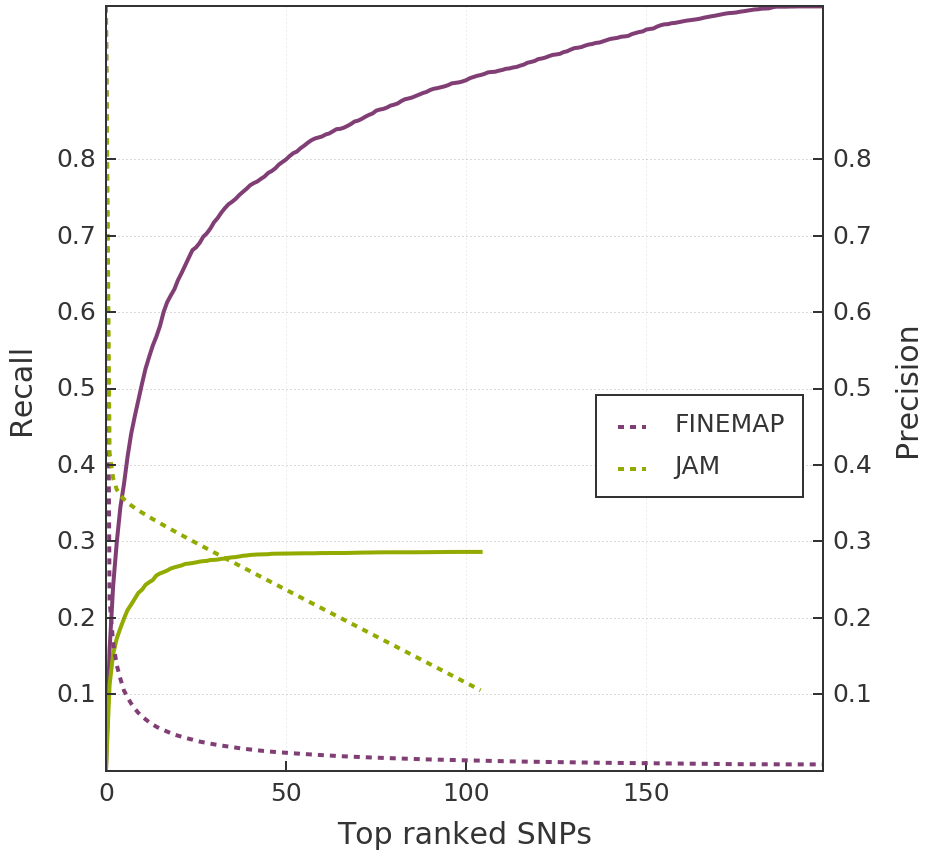

In [6]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray

    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

bordercolor = '#333333'
borderwidth = 2
colors = kelly_colors_hex
figsize = (13, 12)
axis_font_size = 30
label_font_size = 25
legend_font_size = 25


fig = plt.figure(figsize = figsize)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

mlabels = {'blore':   'B-LORE',
           'probit':  'BVSR probit',
           'linear':  'BVSR linear',
           'finemap': 'FINEMAP',
           'jam':     'JAM',
          }

mcolors = {'blore':   colors[4],
           'probit':  colors[2],
           'linear':  colors[3],
           'finemap': colors[1],
           'jam':     colors[16],
          }

for key in ['blore', 'finemap', 'probit', 'linear', 'jam']:
    val = plotvals[key]
    if not val == 0:
        if len(val[0]) > 0:
            x = val[0]
            y = val[2]
            err = val[4]
            #coreplot(ax1, x, y, err, mcolors[key], 'solid', mlabels[key])
            ax1.plot(x, y, color=mcolors[key], lw=4, label=mlabels[key])
            y = val[1]
            err = val[3]
            #coreplot(ax2, x, y, err, mcolors[key], 'dashed', None)
            ax2.plot(x, y, color=mcolors[key], lw=4, label=mlabels[key], ls = 'dashed')

mxlabel = r'Top ranked SNPs'
my1label = r'Recall'
my2label = r'Precision'

ax1.set_xlabel(mxlabel, {'size': axis_font_size, 'color': bordercolor}, labelpad = 15)
ax1.set_ylabel(my1label, {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)
ax2.set_ylabel(my2label, {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)

for ax in [ax1, ax2]:

    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    if xticks is not None: ax.set_xticks(xticks)
    if yticks is not None: ax.set_yticks(yticks)

    h, l = ax.get_legend_handles_labels()
    if len(l) > 0:
        legend = ax.legend(loc='upper right', bbox_to_anchor=(0.98, 0.5),
                           handlelength = 3.0,
                           handletextpad = 2.0,
                           markerscale=5,
                           ncol = 1,
                           frameon = True, borderpad = 1.5, labelspacing = 1.5
                           #title = legendtitle
                          )
        for l in legend.legendHandles:
            l.set_alpha(1)
        lframe = legend.get_frame()
        lframe.set_edgecolor(bordercolor)
        lframe.set_linewidth(borderwidth)
        for fonts in ([legend.get_title()] + legend.texts):
            fonts.set_fontsize(legend_font_size)
            fonts.set_color(bordercolor)

    ax.tick_params(axis='both', which = 'major',
                   length = 10, width = borderwidth, pad=10,
                   labelsize = label_font_size,
                   color = bordercolor,
                   labelcolor = bordercolor,
                   bottom = True, top = False, left = True, right = True
                  )
    for side, border in ax.spines.items():
        border.set_linewidth(borderwidth)
        border.set_color(bordercolor)
    ax.grid(color='dimgray', lw=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
len(thisres)